# **Penting**
- Jangan menambahkan import library atau function apa pun, selain yang sudah tersedia pada cell code.
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Ingat, tugas Anda hanyalah melengkapi code yang rumpang pada bagian yang sudah ditandai "________" saja.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan juga output yang dihasilkan sesuai dengan output yang diharapkan (expected output). Sehingga Anda dapat mereview sendiri terlebih dahulu output dari cell code yang dijalankan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data

### MULAI CODE ###

url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)

### SELESAI CODE ###

In [3]:
# Tampilkan 5 baris pertama dengan function head.

### MULAI CODE ###

df.head()

### SELESAI CODE ###

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.

### MULAI CODE ###

df.info()

### SELESAI CODE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe

### MULAI CODE ###

df.describe()

### SELESAI CODE ###

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

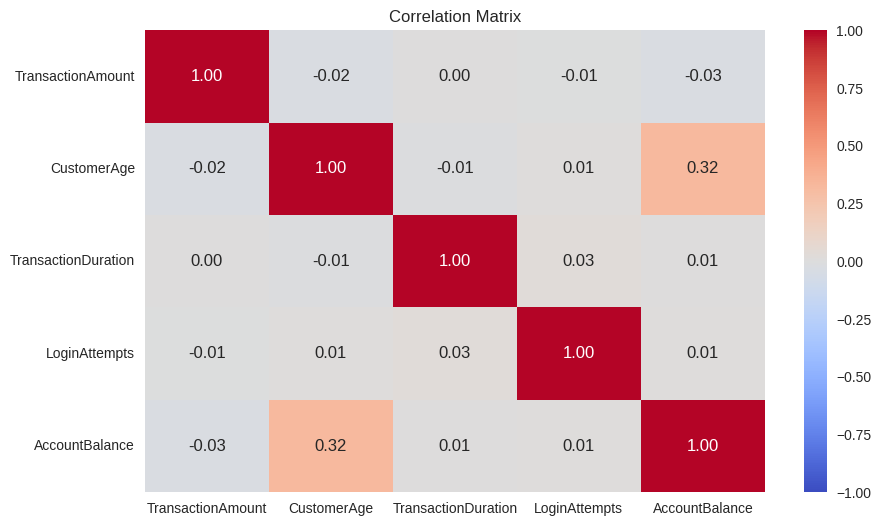

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

# Memilih kolom numerik
numerical_cols = df.select_dtypes(include=['number']).columns

### MULAI CODE ###

# Hitung matriks korelasi
correlation = df[numerical_cols].corr()

# Buat visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation,
               annot=True,
               cmap='coolwarm',
               fmt=".2f",
               vmin=-1,
               vmax=1)
plt.title('Correlation Matrix')
plt.show()

### SELESAI CODE ###

## **Output yang diharapkan:**

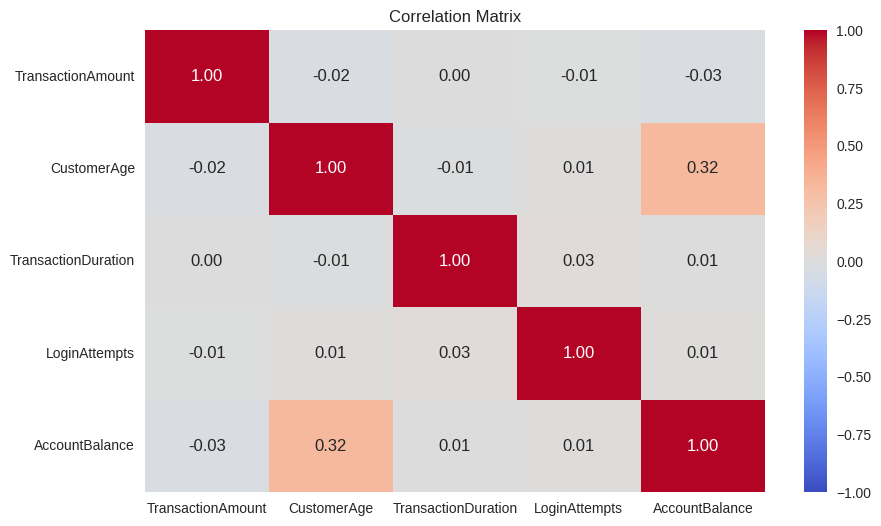

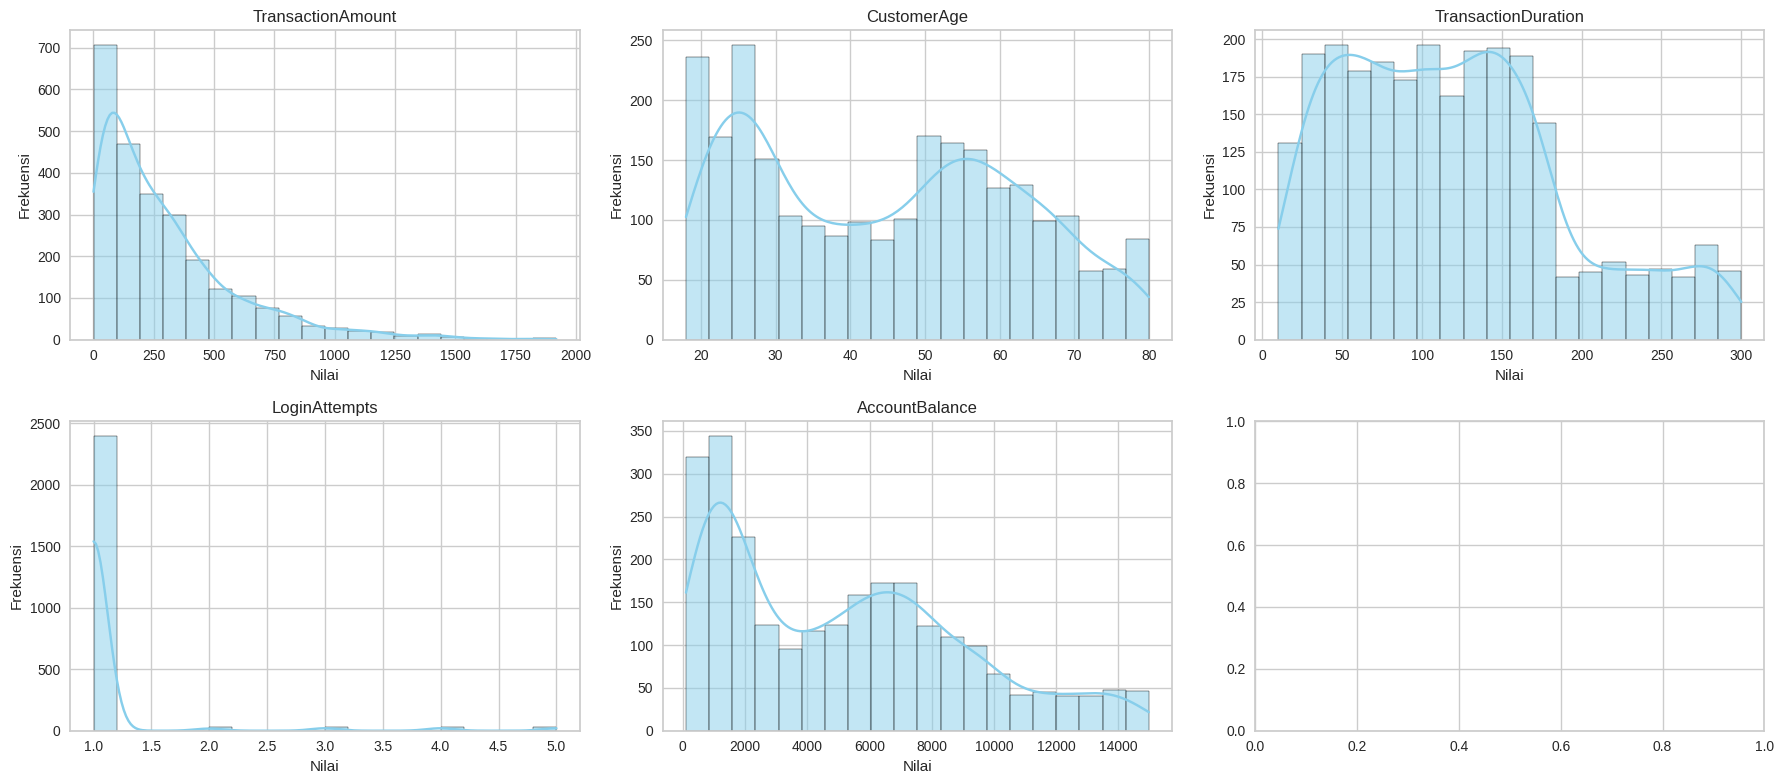

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()

for i, column in enumerate(numerical_cols):

    ### MULAI CODE ###

    # Tampilkan histogram dan pastikan plot ditempatkan di subplot (axes) yang benar
    sns.histplot(df[column], bins=20, kde=True, color='skyblue', ax=axes[i])

    # Atur judul dan label
    axes[i].set_title(column)
    axes[i].set_xlabel("Nilai")
    axes[i].set_ylabel("Frekuensi")

    ### SELESAI CODE ###

plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

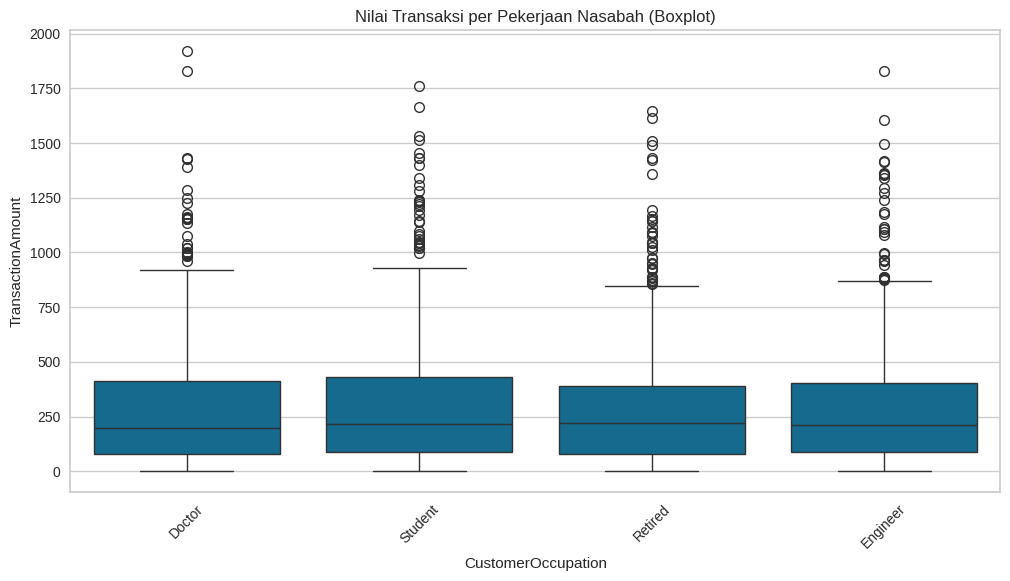

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

### MULAI CODE ###

plt.figure(figsize=(12, 6))

# Buat visualisasi boxplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation' (x)
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Boxplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

### SELESAI CODE ###

# -----------------------------------------------------------------
# (TANTANGAN OPSIONAL)
# -----------------------------------------------------------------
# Sekarang, bagaimana jika kita juga ingin melihat kepadatan distribusi data di setiap kategori?
# Coba buat visualisasi lain di bawah ini, misalnya 'violinplot' (sns.violinplot) dengan parameter yang sama.

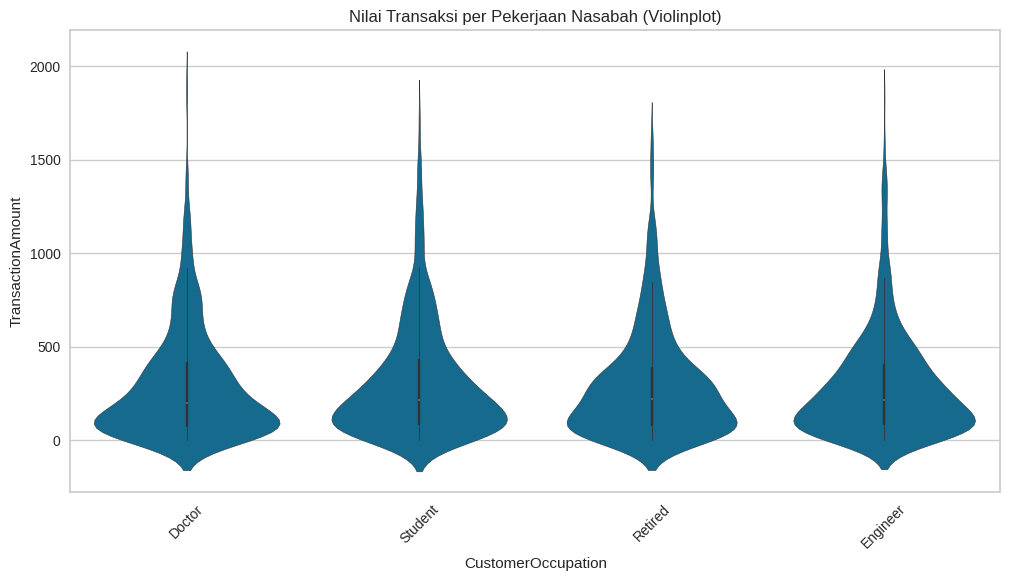

In [9]:
### MULAI CODE ###

plt.figure(figsize=(12, 6))

# Buat visualisasi violinplot untuk melihat sebaran 'TransactionAmount' (y) berdasarkan 'CustomerOccupation' (x)
sns.violinplot(x='CustomerOccupation', y='TransactionAmount', data=df)

plt.title("Nilai Transaksi per Pekerjaan Nasabah (Violinplot)")

# Putar label sumbu-x agar tidak tumpang tindih
plt.xticks(rotation=45)

plt.show()

### SELESAI CODE ###

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan drop pada data null/nan dan data yang duplicate
3. Melakukan drop pada seluruh kolom id, address, dan date.
4. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [10]:
# Mengecek dataset menggunakan isnull().sum()

### MULAI CODE ###

df.isnull().sum()

### SELESAI CODE ###

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [11]:
# Mengecek dataset menggunakan duplicated().sum()

### MULAI CODE ###

df.duplicated().sum()

### SELESAI CODE ###

np.int64(21)

In [12]:
# Menangani data yang hilang.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris yang hilang dan pastikan agar perubahan disimpan kembali ke 'df'
df.dropna(inplace=True)

# Cek kembali dataset menggunakan isnull().sum()
df.isnull().sum()

### SELESAI CODE ###

,0
TransactionID,0
AccountID,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
DeviceID,0
IP Address,0
MerchantID,0
Channel,0


In [13]:
# Menghapus data duplikat.

### MULAI CODE ###

# Panggil fungsi untuk menghapus baris duplikat dan pastikan agar perubahan disimpan kembali ke 'df'
df.drop_duplicates(inplace=True)

# Cek kembali dataset menggunakan duplicated().sum()
df.duplicated().sum()

### SELESAI CODE ###

np.int64(0)

In [14]:
# Melakukan drop pada kolom yang memiliki keterangan Date, id, dan IP Address

### MULAI CODE ###

# Buat list comprehension untuk memfilter nama kolom.
#    - Iterasi melalui semua nama kolom (col).
#    - Cek apakah 'id', 'ip', atau 'date' ada di nama kolom.
#    - Gunakan .lower() untuk membuat perbandingan case-insensitive (mengabaikan besar/kecil).

cols_to_drop = [col for col in df.columns if
                'id' in col.lower() or
                'ip' in col.lower() or
                'date' in col.lower()]

# Gunakan fungsi .drop() untuk menghapus kolom-kolom yang ada di 'cols_to_drop'.
df = df.drop(columns=cols_to_drop)

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68


In [15]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.

### MULAI CODE ###

# Pilih semua kolom yang bertipe 'object' (kategorikal)
categorical_cols = list(df.select_dtypes(include=['object']).columns)

encoders = {}

# Loop melalui setiap kolom kategorikal
for column in categorical_cols:
    # Buat (instantiate) objek LabelEncoder
    label_encoder = LabelEncoder()

    # Terapkan (fit) encoder ke data dan sekaligus ubah (transform) data tersebut
    df[column] = label_encoder.fit_transform(df[column])

    # Simpan encoder
    encoders[column] = label_encoder

# Tampilkan 5 baris pertama untuk memverifikasi hasil encoding
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68


In [16]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.

### MULAI CODE ###

df.columns.tolist()

### SELESAI CODE ###

['TransactionAmount',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [17]:
# Melakukan Handling Outlier Data menggunakan metode drop.

for col in numerical_cols:

    ### MULAI CODE ###

    # Hitung Kuartil 1 (Q1) dan Kuartil 3 (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Hitung Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Tentukan batas bawah (lower bound) dan batas atas (upper bound)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter DataFrame: Simpan hanya baris di mana nilai 'df[col]' berada DI ANTARA (inklusif) batas bawah dan batas atas.
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    ### SELESAI CODE ###

# Tampilkan statistik deskriptif setelah outlier dihapus
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.0,1945.000000
mean,256.838278,0.771722,21.299743,0.977378,44.693059,1.503342,119.225193,1.0,5100.811913
std,218.370197,0.419830,12.329250,0.804119,17.743453,1.135888,70.600647,0.0,3907.153333
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.0,102.200000
25%,78.920000,1.000000,11.000000,0.000000,27.000000,0.000000,63.000000,1.0,1488.650000
50%,199.700000,1.000000,21.000000,1.000000,45.000000,1.000000,111.000000,1.0,4693.600000
75%,374.500000,1.000000,32.000000,2.000000,59.000000,3.000000,162.000000,1.0,7659.990000
max,903.190000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,1.0,14977.990000


In [18]:
# Melakukan feature scaling menggunakan StandardScaler() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

### MULAI CODE ###

# Buat (instantiate) StandardScaler
scaler = StandardScaler()

# Terapkan (fit) scaler ke data dan sekaligus ubah (transform) data tersebut
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasil scaling
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [19]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

### MULAI CODE ###

# Tentukan kolom numerik yang ingin Anda kelompokkan
col_to_bin = 'CustomerAge'  # (Isi dengan 'CustomerAge' atau kolom numerik lain)

# Tentukan nama untuk kolom kategori baru
new_col_name = 'AgeGroup'

# Tentukan label untuk 3 grup (Anda dapat menentukan nama label-nya sendiri)
# Mulai dari rendah --> sedang --> tinggi
bin_labels = ['Muda', 'Dewasa', 'Tua']

# Gunakan 'pd.qcut' untuk membagi data menjadi 3 kelompok
df[new_col_name] = pd.qcut(df[col_to_bin], q=3, labels=bin_labels, duplicates='drop')

# Lakukan Label Encoding pada kolom baru ini agar menjadi numerik
label_encoder = LabelEncoder()
df[new_col_name] = label_encoder.fit_transform(df[new_col_name])

# Simpan encoder dan tambahkan nama kolom baru ke 'categorical_cols'
encoders[new_col_name] = label_encoder
categorical_cols.extend([new_col_name])

# Tampilkan 5 baris pertama untuk memverifikasi
df.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,2
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,2
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,1
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [20]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.

### MULAI CODE ###

# Buat salinan (copy) dari 'df' ke variabel 'df_used'
df_used = df.copy()

# Tampilkan ringkasan statistik dari DataFrame 'df'
df_used.describe()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1.945000e+03,1945.000000,1.945000e+03,1945.0,1.945000e+03,1945.000000
mean,-8.402305e-17,0.771722,21.299743,0.977378,-1.269479e-16,1.503342,2.557223e-17,0.0,-6.027740e-17,0.998972
std,1.000257e+00,0.419830,12.329250,0.804119,1.000257e+00,1.135888,1.000257e+00,0.0,1.000257e+00,0.810171
min,-1.175271e+00,0.000000,0.000000,0.000000,-1.504776e+00,0.000000,-1.547483e+00,0.0,-1.279678e+00,0.000000
25%,-8.149648e-01,1.000000,11.000000,0.000000,-9.974163e-01,0.000000,-7.965883e-01,0.0,-9.247374e-01,0.000000
50%,-2.617251e-01,1.000000,21.000000,1.000000,1.730327e-02,1.000000,-1.165330e-01,0.0,-1.042490e-01,1.000000
75%,5.389562e-01,1.000000,32.000000,2.000000,8.065296e-01,3.000000,6.060257e-01,0.0,6.551666e-01,2.000000
max,2.960651e+00,1.000000,42.000000,2.000000,1.990369e+00,3.000000,2.561185e+00,0.0,2.528623e+00,2.000000


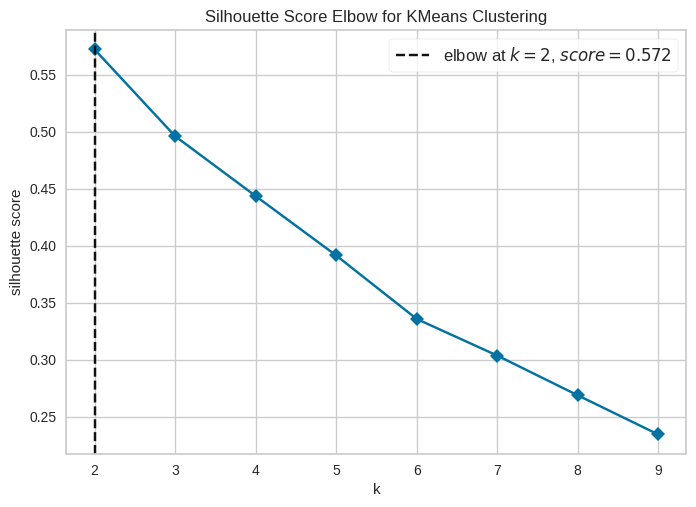

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [21]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

# Buat (instantiate) model clustering
model = KMeans()

### MULAI CODE ###

# Buat (instantiate) KElbowVisualizer
#  - Masukkan 'model' yang akan digunakan
#  - Tentukan jumlah cluster yang akan diuji (range 2 sampai 10)
#  - Tentukan 'metric' evaluasi
visualizer = KElbowVisualizer(model,
                       k=(2,10),
                       metric='silhouette',
                       timings=False)

# Jalankan (fit) visualizer pada data
visualizer.fit(df)

# Tampilkan plot
visualizer.show()

### SELESAI CODE ###

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

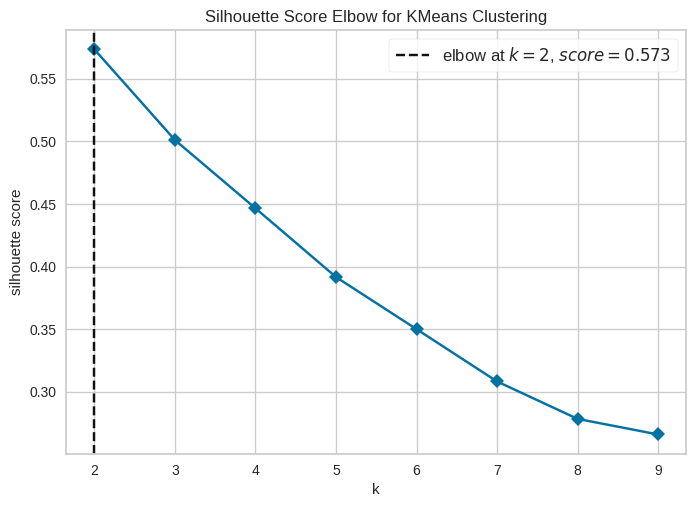

In [22]:
# Menggunakan algoritma K-Means Clustering

### MULAI CODE ###

# Buat (instantiate) objek model KMeans
#  - Tentukan jumlah cluster (n_clusters)
model = KMeans(n_clusters=3, random_state=42)

# Latih (fit) model dengan data Anda (df)
model.fit(df)

### SELESAI CODE ###

KMeans(n_clusters=3, random_state=42)

Jalankan cell code ini untuk menyimpan model kamu.

In [23]:
# Menyimpan model menggunakan joblib

### MULAI CODE ###

# Simpan model clustering yang sudah dilatih
joblib.dump(model, "model_clustering.h5")

### SELESAI CODE ###

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menghitung dan menampilkan nilai Silhouette Score.

### MULAI CODE ###

# Dapatkan hasil (label) cluster dari model 'kmeans' yang telah di-fit
labels = model.labels_

# Panggil fungsi untuk menghitung silhouette score
score = silhouette_score(df, labels)

# Cetak skornya
print("Silhouette Score:", score)

### SELESAI CODE ###

Silhouette Score: 0.4959763687323938


/tmp/ipython-input-654673482.py:19: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


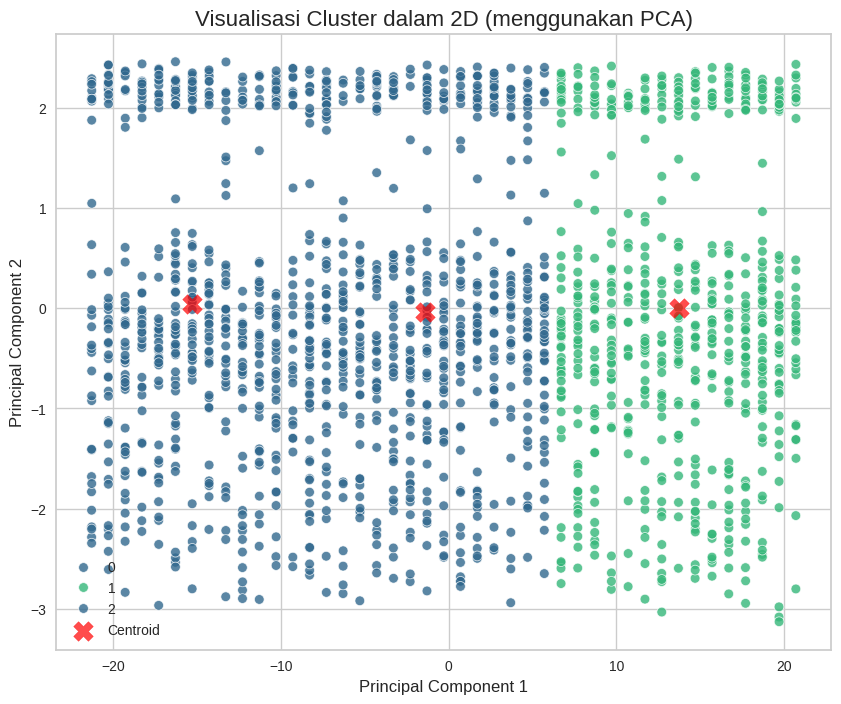

In [25]:
# Membuat visualisasi hasil clustering

### MULAI CODE ###

# Buat (instantiate) objek PCA untuk 2 komponen (n_components=2)
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df' dan transformasikan data tersebut
df_pca = pca.fit_transform(df)

# Buat DataFrame baru 'df_pca' dari hasil transformasi
df_pca = pd.DataFrame(data=df_pca, columns=['Principal Component 1', 'Principal Component 2'])

# Tambahkan kolom 'Cluster' ke 'df_pca' menggunakan 'labels'(variabel dari hasil 'kmeans.labels_' sebelumnya)
df_pca['Cluster'] = labels

# Buat scatter plot menggunakan Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    hue='Cluster',  # Warnai titik berdasarkan kolom 'Cluster'
    palette=sns.color_palette("viridis", n_colors=2),
    data=df_pca,
    legend="full",
    alpha=0.8
)

### SELESAI CODE ###

plt.title('Visualisasi Cluster dalam 2D (menggunakan PCA)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
centers = pca.transform(model.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.7, marker='X', label='Centroid')
plt.legend()
plt.show()

## **Output yang diharapkan** (bisa saja sedikit berbeda)**:**

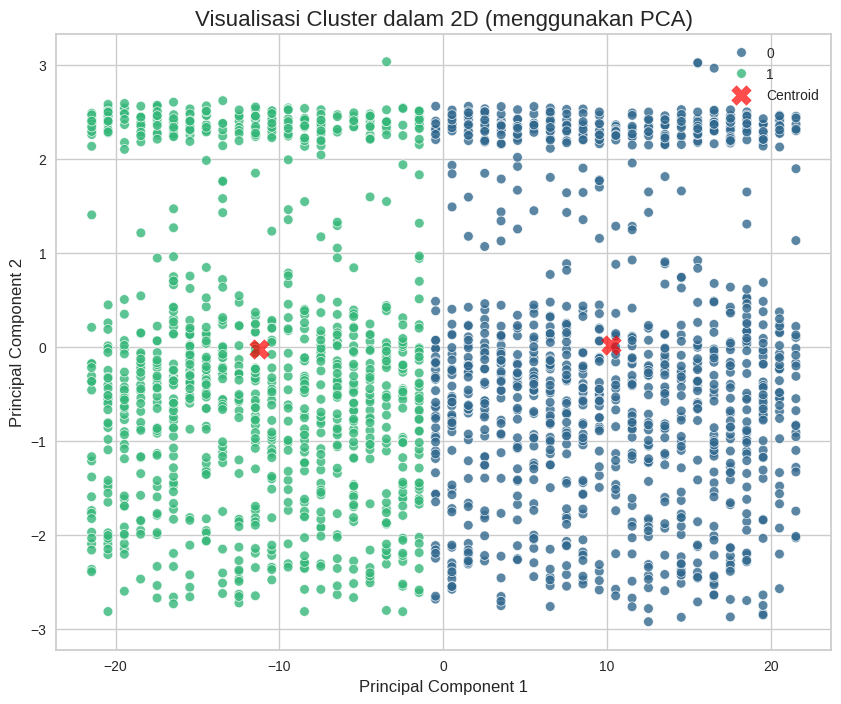

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Membangun model menggunakan PCA.

### MULAI CODE ###

# Buat (instantiate) objek PCA dengan 2 komponen
pca = PCA(n_components=2)

# Terapkan (fit) PCA ke data 'df_used' dan transformasikan data tersebut
df_pca_array = pca.fit_transform(df_used)

# Buat DataFrame baru 'data_final' dari hasil array PCA
data_final = pd.DataFrame(data=df_pca_array, columns=['PCA1', 'PCA2'])

# Buat (instantiate) model KMeans BARU
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Latih (fit) model KMeans BARU ini HANYA pada 'data_final'
kmeans_pca.fit(data_final)

### SELESAI CODE ###

KMeans(n_clusters=3, random_state=42)

In [27]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")

### MULAI CODE ###

# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

### SELESAI CODE ###

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Transaction Amount:** -0.01
  - **Rata-rata (mean) Customer Age:** 0.32
  - **Analisis:** Cluster ini mencakup pelanggan usia lanjut usia dengan jumlah transaksi yang dilakukan cukup rendah. Pelanggan dalam cluster ini cenderung memiliki daya beli yang rendah dan cenderung bermain aman. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan dengan resiko rendah.


In [28]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

### MULAI CODE ###

# Tambahkan kolom 'Cluster' baru berupa 'labels' (variabel dari 'kmeans.labels_' sebelumnya)
df_used['Cluster'] = labels

# Kelompokkan (groupby) 'df_used' berdasarkan 'Cluster' dan hitung agregasi untuk 'numerical_cols'.
agg_summary = df_used.groupby('Cluster')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Tampilkan hasil ringkasan
display(agg_summary)

### SELESAI CODE ###

Cluster                      0     1     2
TransactionAmount   mean -0.01  0.01  0.00
                    min  -1.17 -1.18 -1.17
                    max   2.96  2.90  2.90
CustomerAge         mean  0.01 -0.05  0.04
                    min  -1.50 -1.50 -1.50
                    max   1.99  1.99  1.99
TransactionDuration mean  0.01 -0.03  0.02
                    min  -1.55 -1.55 -1.55
                    max   2.56  2.55  2.55
LoginAttempts       mean  0.00  0.00  0.00
                    min   0.00  0.00  0.00
                    max   0.00  0.00  0.00
AccountBalance      mean -0.03  0.00  0.02
                    min  -1.28 -1.28 -1.28
                    max   2.52  2.53  2.52

1. **CLUSTER 0: (Nasabah Konservatif)**:
  - **Rata-rata (mean) TransactionAmount**: -0.01
  - **Rata-rata (mean) CustomerAge**: 0.01
  - **Rata-rata (mean) TransactionDuration**: 0.01
  - **Rata-rata (mean) LoginAttempts**: 0.00
  - **Rata-rata (mean) AccountBalance**: -0.03
  - **Analisis:** Cluster ini adalah nasabah dengan profil paling standar — Nilai transaksi, usia, dan saldo rekening semuanya mendekati rata-rata populasi. Jumlah transaksi sedikit lebih rendah dan saldo rekening juga sedikit di bawah rata-rata, menunjukkan ini adalah segmen nasabah menengah dengan pendapatan stabil namun tidak terlalu besar. Segmen ini kemungkinan adalah karyawan dengan gaji bulanan tetap yang menggunakan bank untuk kebutuhan sehari-hari seperti menerima gaji, bayar tagihan, dan belanja rutin. Mereka tidak terlalu banyak melakukan transaksi besar.
  
  - **Rekomendasi:** untuk kelompok nasabah ini yaitu fokus pada produk yang meningkatkan frekuensi penggunaan dan kemudahan transaksi. Tawarkan paket bundling yang hemat seperti: tabungan dengan biaya admin rendah, kartu debit gratis, dan diskon merchant. Berikan program poin reward untuk setiap transaksi agar mereka lebih sering menggunakan layanan bank. Strategi ini untuk meningkatkan pendapatan dari volume transaksi yang banyak, bukan dari margin besar per transaksi.
2. **CLUSTER 1: (Nasabah Muda)**:
  - **Rata-rata (mean) TransactionAmount**: -0.01
  - **Rata-rata (mean) CustomerAge**: 0.01
  - **Rata-rata (mean) TransactionDuration**: 0.01
  - **Rata-rata (mean) LoginAttempts**: 0.00
  - **Rata-rata (mean) AccountBalance**: -0.03
  - **Analisis:** Cluster ini adalah nasabah yang lebih muda dari rata-rata dengan ciri khas bertransaksi lebih cepat. Durasi transaksi yang lebih singkat menunjukkan mereka sangat familiar dengan teknologi digital dan mobile banking. Saldo rekening mereka rata-rata, menunjukkan kondisi finansial yang cukup stabil meski belum mapan. Ini adalah generasi milenial dan Gen Z yang sudah terbiasa dengan aplikasi dan transaksi online. Mereka mengutamakan kecepatan dan kemudahan. Meskipun saat ini saldo mereka belum besar, potensi pertumbuhan mereka sangat tinggi karena karir mereka masih akan berkembang 10-20 tahun ke depan.
  
  - **Rekomendasi:** Investasi besar pada segmen ini adalah keputusan strategis jangka panjang. Tingkatkan kualitas aplikasi mobile banking dengan fitur-fitur modern seperti transfer instan, split bill, QR payment, dan integrasi dengan e-commerce. Tawarkan produk investasi dengan nominal kecil yang dapat dimulai dari 10 USD seperti reksadana online dan nabung emas digital. Buat program cashback untuk transaksi di merchant online. Gunakan strategi referral karena segmen ini aktif di media sosial dan bisa jadi brand ambassador. Tujuannya adalah membangun loyalitas sejak dini agar ketika pendapatan mereka naik, mereka tetap menggunakan bank kita.

3. **Cluster 2: (Nasabah Prioritas)**
  - **Rata-rata (mean) TransactionAmount**: 0.00
  - **Rata-rata (mean) CustomerAge**: 0.04
  - **Rata-rata (mean) TransactionDuration**: 0.02
  - **Rata-rata (mean) LoginAttempts**: 0.00
  - **Rata-rata (mean) AccountBalance**: 0.02
  - **Analisis:** Cluster ini adalah nasabah dengan usia sedikit lebih tua dan saldo rekening lebih tinggi dari rata-rata. Yang menarik, mereka membutuhkan waktu sedikit lebih lama saat bertransaksi - ini bukan karena kesulitan, tapi karena mereka lebih hati-hati dan teliti dalam mengambil keputusan finansial. Ini ciri khas nasabah dengan kondisi finansial yang sudah mapan. Segmen ini adalah profesional senior, manager, atau pengusaha yang sudah memiliki penghasilan stabil dan tabungan yang cukup. Mereka tidak mencari diskon atau cashback kecil, tapi lebih mengutamakan keamanan, layanan berkualitas, dan produk yang bisa melindungi serta mengembangkan aset mereka. Segmen ini paling menguntungkan karena margin profit per nasabah paling tinggi.
  - **Rekomendasi:** Berikan layanan premium dan personal. Sediakan relationship manager khusus yang bisa dihubungi langsung untuk konsultasi finansial. Tawarkan produk investasi dan proteksi yang sesuai: deposito dengan bunga menarik, reksadana campuran, obligasi, program pensiun, asuransi jiwa dan kesehatan keluarga. Buat program prioritas seperti antrian khusus di cabang, customer service dedicated, dan akses lounge bandara untuk pemegang kartu kredit premium. Fokus pada menjaga kepuasan mereka agar tidak pindah ke bank lain, karena kehilangan satu nasabah dari segmen ini sama dengan kehilangan 5-10 nasabah dari segmen standar dari sisi profit. Selain itu terapkan Cross-selling pada produk KPR, kredit kendaraan, atau modal usaha dengan bunga kompetitif.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [29]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

### MULAI CODE ###

df_used.rename(columns={"Cluster": "Target"}, inplace=True)

# Tampilkan 5 baris pertama untuk memverifikasi
df_used.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,-1.111922,1,36,0,1.426636,0,-0.541568,0.0,0.002918,2,1
1,0.546926,1,15,0,1.313889,0,0.308502,0.0,2.216531,2,2
2,-0.597984,1,23,2,-1.448403,3,-0.895763,0.0,-1.018513,1,2
3,-0.331350,1,33,2,-1.053790,3,-1.334965,0.0,0.887895,1,1
5,-0.754364,1,28,0,-1.504776,3,0.747704,0.0,-1.105726,1,1


In [30]:
# Simpan Data

### MULAI CODE ###

df_used.to_csv('data_clustering.csv', index=False)

### SELESAI CODE ###

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [31]:
# inverse dataset ke rentang normal untuk numerikal

df_inverse = df_used.copy()

### MULAI CODE ###

# Gunakan 'scaler' untuk mengembalikan 'numerical_cols' ke nilai aslinya.
df_inverse[numerical_cols] = scaler.inverse_transform(df_inverse[numerical_cols])

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,1,36,0,70.0,0,81.0,1.0,5112.21,2,1
1,376.24,1,15,0,68.0,0,141.0,1.0,13758.91,2,2
2,126.29,1,23,2,19.0,3,56.0,1.0,1122.35,1,2
3,184.50,1,33,2,26.0,3,25.0,1.0,8569.06,1,1
5,92.15,1,28,0,18.0,3,172.0,1.0,781.68,1,1


In [32]:
# inverse dataset yang sudah diencode ke kategori aslinya.

### MULAI CODE ###

for column in categorical_cols:
    # Ambil encoder yang tepat untuk 'column' dari dictionary 'encoders'
    encoder = encoders[column]

    # Gunakan encoder untuk mengembalikan (inverse) kolom tersebut
    df_inverse[column] = encoder.inverse_transform(df_inverse[column].astype(int))

# Tampilkan 5 baris pertama untuk memverifikasi hasilnya
df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Tua,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tua,2
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Muda,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Muda,1


In [33]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

### MULAI CODE ###

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'numerical_cols'.
agg_summary_num = df_inverse.groupby('Target')[numerical_cols].agg(['mean', 'min', 'max']).round(2).T

# Kelompokkan (groupby) 'df_inverse' berdasarkan 'Target' dan hitung agregasi untuk 'categorical_cols'.
#   - Hitung agregasi (agg) 'mode' (nilai yang paling sering muncul).
#   - (Kita gunakan 'lambda x: x.mode()[0]' untuk mengambil nilai mode pertama)
agg_summary_cat = df_inverse.groupby('Target')[categorical_cols].agg(lambda x: x.mode()[0]).round(2).T

### SELESAI CODE ###

# Tampilkan kedua hasil ringkasan
display(agg_summary_num)
display(agg_summary_cat)

Target                           0         1         2
TransactionAmount   mean    254.56    258.21    257.29
                    min       0.32      0.26      0.45
                    max     903.19    889.01    890.24
CustomerAge         mean     44.84     43.85     45.41
                    min      18.00     18.00     18.00
                    max      80.00     80.00     80.00
TransactionDuration mean    119.74    117.31    120.70
                    min      10.00     10.00     10.00
                    max     300.00    299.00    299.00
LoginAttempts       mean      1.00      1.00      1.00
                    min       1.00      1.00      1.00
                    max       1.00      1.00      1.00
AccountBalance      mean   5001.21   5109.80   5170.92
                    min     117.98    102.20    112.76
                    max   14935.50  14977.99  14942.78

Target,0,1,2
TransactionType,Debit,Debit,Debit
Location,Charlotte,Tucson,Fort Worth
Channel,Branch,Branch,Branch
CustomerOccupation,Student,Student,Engineer
AgeGroup,Muda,Muda,Dewasa


1. **Cluster 0: (Nasabah Muda)**:
  - **Rata-rata (mean) TransactionsAmount:** 254.56
  - **Rata-rata (mean) CustomerAge:** 44.84
  - **Rata-rata (mean) TransactionDuration:** 119.74
  - **Rata-rata (mean) AccountBalance:** 5001.21
  - **Analisis:** Cluster ini segmen mahasiswa muda dengan nilai transaksi dan saldo rekening yang paling rendah dibanding cluster lain, mayoritas melakukan transaksi debit di cabang fisik atau Branch di Charlotte.
  = **Rekomendasi:** Fokus pada produk student banking dengan paket yang memudahkan biaya admin transaksi mereka serta benefit bank dalam program tabungan berjangka untuk membangun kebiasaan menabung. Selain itu, dapat meningkatkan adopsi digital banking dengan insentif cashback untuk mengurangi ketergantungan pada cabang fisik yang lebih mahal operasionalnya.

2. **Cluster 1: (Nasabah Produktif)**:
  - **Rata-rata (mean) TransactionsAmount:** 258.21
  - **Rata-rata (mean) CustomerAge:** 43.85
  - **Rata-rata (mean) TransactionDuration:** 117.31
  - **Rata-rata (mean) AccountBalance:** 5109.80
  - **Analisis:** Cluster ini juga merupakan segmen mahasiswa muda dengan nilai transaksi yang paling tinggi dibanding cluster lain dan nasabah lebih familiar dengan proses perbankan yang efisien. Saldo akun cluster ini moderat dan  mayoritas melakukan transaksi debit di cabang fisik atau Branch di Tucson.
  = **Rekomendasi:** Segmen ini adalah target ideal untuk migrasi ke digital banking karena sudah menunjukkan efisiensi dalam bertransaksi. Aplikasi mobile dengan UX yang smooth, fitur quick transfer, dan program reward menjadi jawaban untuk transaksi digital. Berikan insentif untuk beralih dari cabang ke mobile.

3. **Cluster 2: (Nasabah Insinyur)**:
  - **Rata-rata (mean) TransactionsAmount:** 257.29
  - **Rata-rata (mean) CustomerAge:** 45.41
  - **Rata-rata (mean) TransactionDuration:** 120.70
  - **Rata-rata (mean) AccountBalance:** 5170.92
  - **Analisis:** Cluster ini merupakan segmen  profesional Engineer dengan usia lebih dewasa. Mereka punya saldo paling tinggi, lebih hati-hati dalam bertransaksi (lebih lama dikit prosesnya), dan tetap prefer datang langsung ke cabang. Mayoritas di Fort Worth.
  = **Rekomendasi:** Tawarkan produk investasi konservatif seperti deposito berjangka, obligasi pemerintah, dan reksadana pendapatan tetap yang memberikan return stabil dan risiko rendah. Cross-sell produk proteksi keluarga seperti asuransi jiwa, kesehatan, dan dana pensiun untuk keamanan jangka panjang. Berikan akses ke wealth management dengan konsultasi finansial berkala dan personal banker dedicated. Untuk kebutuhan kredit, sediakan KPR dan kredit kendaraan dengan proses approval yang cepat. Yang paling penting, berikan layanan prioritas seperti counter khusus tanpa antrian, relationship manager yang bisa dihubungi langsung, dan waive biaya admin untuk membuat mereka merasa dihargai sebagai nasabah premium.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [34]:
# Periksa kembali data yang telah di-inverse.

### MULAI CODE ###

df_inverse.head()

### SELESAI CODE ###

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup,Target
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,Tua,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,Tua,2
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,Muda,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,Muda,1
5,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,Muda,1


In [35]:
# Simpan Data Inverse

### MULAI CODE ###

df_inverse.to_csv('data_clustering_inverse.csv', index=False)

### SELESAI CODE ###

End of Code.